# <img style="float: left; padding-right: 20px; width: 200px" src="https://github.com/ymotomy/ymotomy.github.io/blob/main/imagenes/UC.png?raw=true">  AST211 - Introducción al Análisis de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2025-1**<br>
**Estudiante:** Tomás Romero <br>
---

## **TAREA 2**<br>

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from random import randint, uniform, choices

**1.-** Construya 10 imagenes de cielo de 400x400 pixeles, con cuentas que sigan una distribucion de
Poisson de media 1000 cuentas. Una vez creadas, lea los arreglos y verifique que sigan la distribucion
esperada. Calcule tambien algunas estadisticas basicas

Seteamos los parametros

In [85]:
# Parámetros
tamano = 400  # 400x400 píxeles
media = 1000          # Media de la distribución de Poisson
cantidad_imagenes = 10  # Número de imágenes a generar

Creamos las imagenes

In [86]:
# Creacion de las imagenes
cielos = []
for i in range(cantidad_imagenes):
    cielos.append(np.random.poisson(lam = media, size = (tamano, tamano)))

Text(0.5, 0, 'X (pix)')

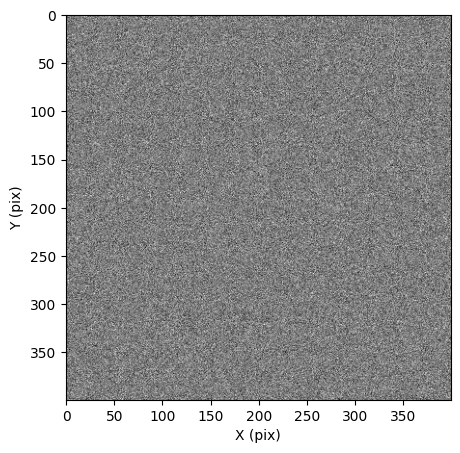

In [87]:
i = randint(0, cantidad_imagenes - 1)
fig,ax=plt.subplots(figsize=(10,5))
ax.imshow(cielos[i], cmap = "gray")
ax.set_ylabel('Y (pix)')
ax.set_xlabel('X (pix)')

In [88]:
df = pd.DataFrame(columns=["Imagen", "media", "varianza", "desviacion", "poisson_check"])
for i in range(cantidad_imagenes):
    media = cielos[i].mean()
    varianza = cielos[i].var()
    desviacion = cielos[i].std()
    poisson_check = abs(media - varianza) < 10  # 10 para ajustar el rango de error, que sera un error menor a 1%
    
    df.loc[i] = [i, media, varianza, desviacion, poisson_check]

df

Imagen        media     varianza  desviacion  poisson_check
0       0   999.863281  1005.605877   31.711289           True
1       1  1000.021363   998.163131   31.593720           True
2       2  1000.093187  1001.346641   31.644062           True
3       3  1000.079800  1000.802307   31.635460           True
4       4   999.984594   994.777519   31.540094           True
5       5   999.932906  1003.855780   31.683683           True
6       6   999.901869   993.157239   31.514397           True
7       7   999.955231  1003.080015   31.671438           True
8       8  1000.175956  1003.982633   31.685685           True
9       9  1000.052719   996.409677   31.565958           True

Por lo tanto podemos ver que todas corresponden a distribuciones poisson

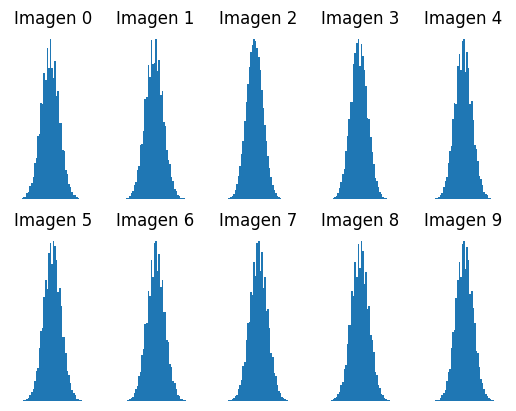

In [89]:
for i in range(cantidad_imagenes):
    plt.subplot(2, 5, i + 1)
    plt.hist(cielos[i].flatten(), bins=50, density=True)
    plt.title(f"Imagen {i}")
    plt.axis("off")

Tambien podemos observar en los graficos que se distirbuyen como poisson.

**2.-** Cree una imagen con un numero aleatorio de estrellas entre 20 y 40, ubicadas en posiciones aleatorias dentro del campo. El perfil de cada estrella debe seguir una distribucion gaussiana con un ancho a media altura (FWHM) de 3.5 pixeles. Las intensidades maximas deben seguir una distribucion uniforme entre 20 y 10000 cuentas

In [90]:
def gaussian(A, x, y, x0, y0, std): ##función que hace gaussianas usando LA DESVIACIÓN ESTANDAR!!!!!!!!!
    return A*np.exp(-((x-x0)**2+(y-y0)**2)/(2*std**2))

In [91]:
# Relación entre FWHM y sigma (std dev) en una gaussiana:
# FWHM = 2.355 * sigma => sigma = FWHM / 2.355
fwhm = 3.5
std = fwhm / 2.355

#Imagen Vacia
empty_image = np.zeros((tamano,tamano))
Y, X = np.indices(empty_image.shape)

# Número aleatorio de estrellas
num_stars = randint(20, 40)
coord_stars = []

In [92]:
stars_image = np.zeros((tamano, tamano))
image = np.zeros((tamano, tamano))  # Inicializar la imagen vacía
# Generar estrellas
for i in range(num_stars):
    x0 = randint(20, tamano - 21)
    y0 = randint(20, tamano - 21)
    A = uniform(20, 10000)
    star = A * np.exp(-((X - x0)**2 + (Y - y0)**2) / (2 * std**2))
    stars_image += star
    coord_stars.append((x0, y0, A))  # Guardamos coordenadas y amplitud

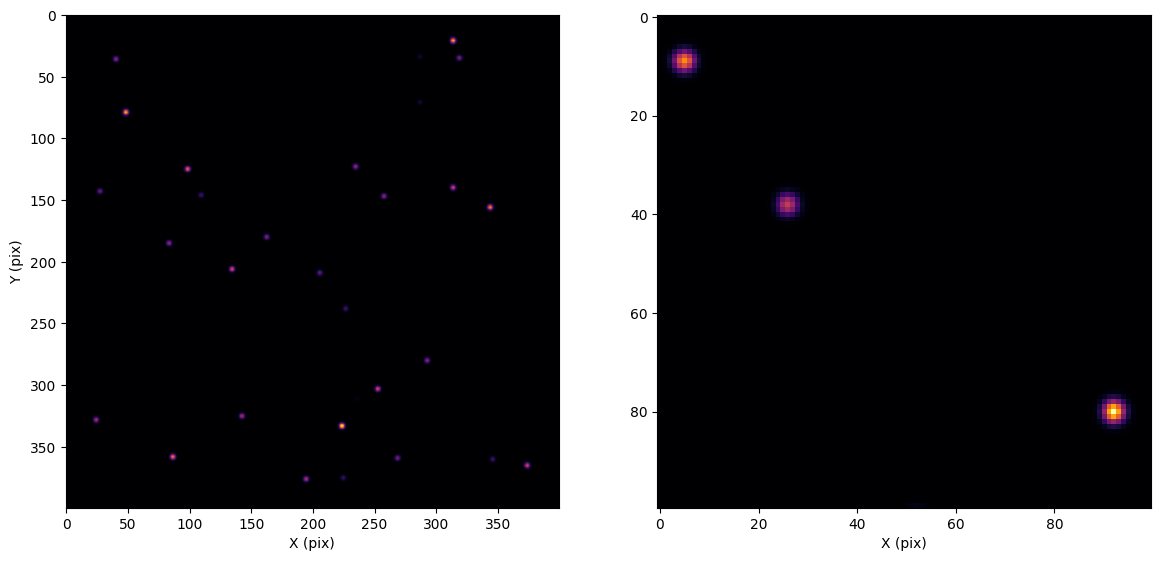

In [93]:
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(14, 7))
# Mostrar imagen
ax.imshow(stars_image, cmap="inferno")
ax1.imshow(stars_image[200:300, 200:300], cmap="inferno")
ax.set_ylabel("Y (pix)")
ax1.set_xlabel("X (pix)")
ax.set_xlabel("X (pix)")
plt.show()

**3.-** Luego de agregar las estrellas, seleccione algunas y haga cortes en los ejes x e y pasando por su
centro. Verifique que el perfil corresponde al esperado para una gaussiana.

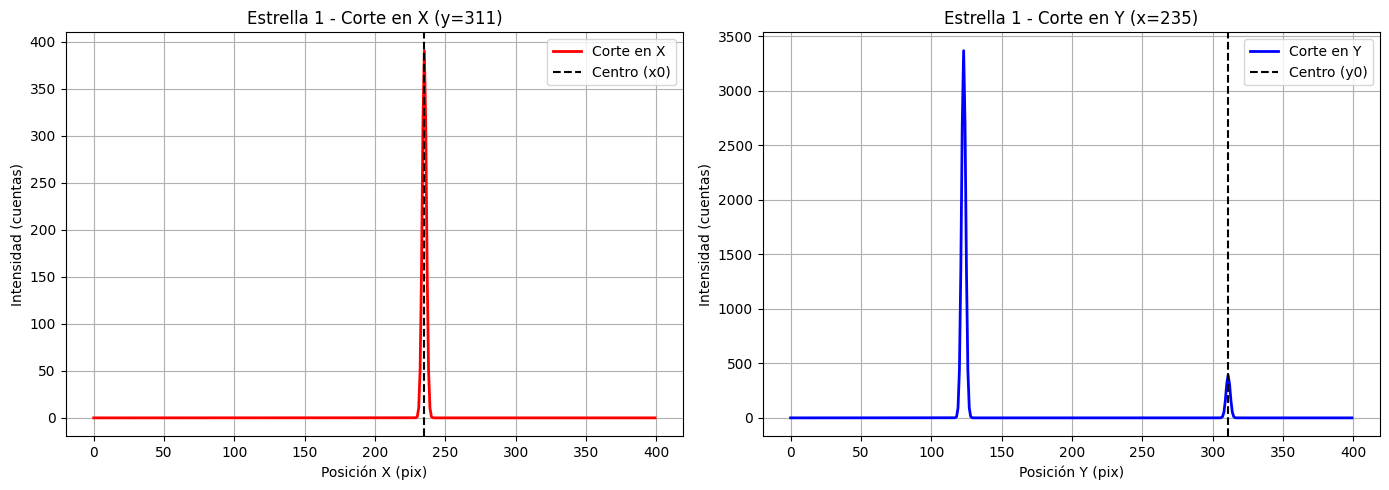

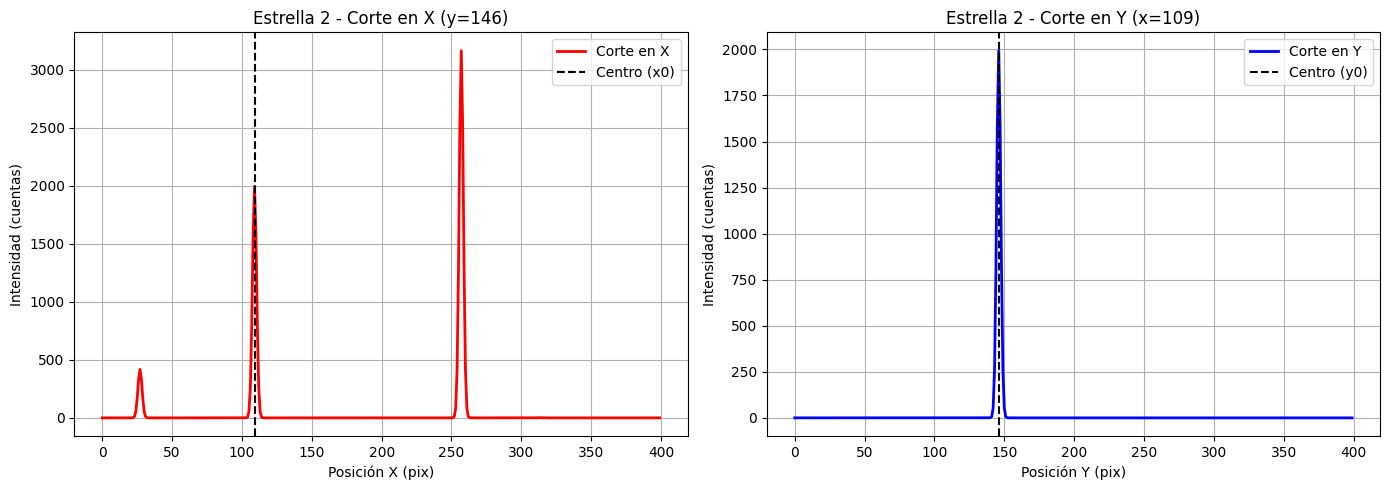

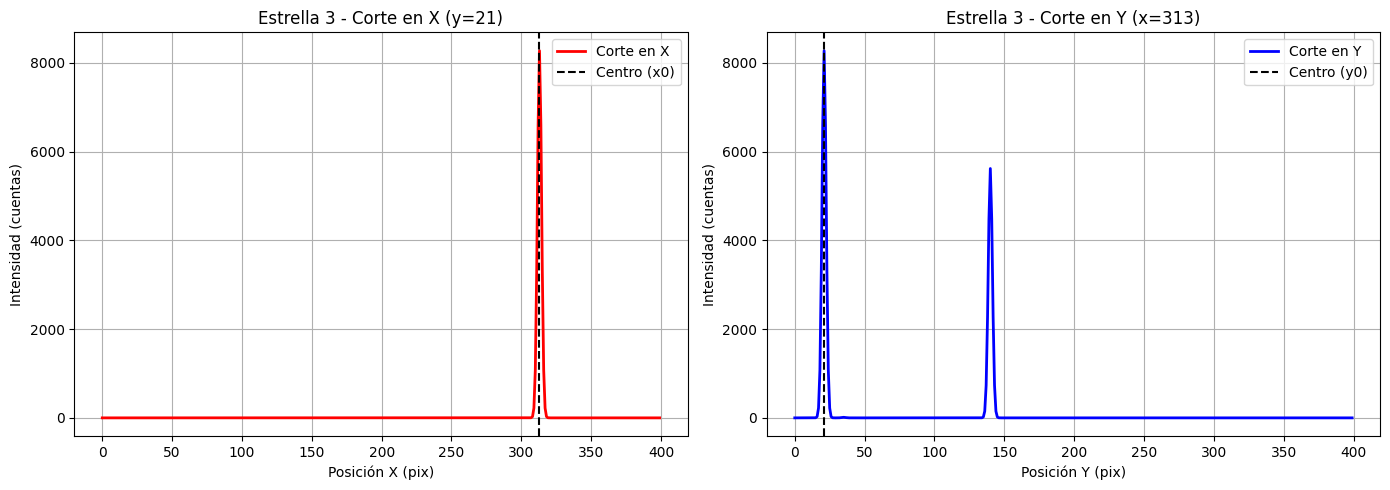

In [94]:
# Seleccionar las primeras 3 estrellas para analizar
selected_stars = coord_stars[:3]

# Graficar cortes para cada estrella seleccionada
for idx, (x0, y0, A) in enumerate(selected_stars):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Corte en x (perfil horizontal)
    x_cut = stars_image[y0, :]  # Fila y0 (eje x)
    ax1.plot(x_cut, 'r-', linewidth=2, label='Corte en X')
    ax1.axvline(x=x0, color='k', linestyle='--', label='Centro (x0)')
    ax1.set_title(f'Estrella {idx+1} - Corte en X (y={y0})')
    ax1.set_xlabel('Posición X (pix)')
    ax1.set_ylabel('Intensidad (cuentas)')
    ax1.legend()
    ax1.grid(True)
    
    # Corte en y (perfil vertical)
    y_cut = stars_image[:, x0]  # Columna x0 (eje y)
    ax2.plot(y_cut, 'b-', linewidth=2, label='Corte en Y')
    ax2.axvline(x=y0, color='k', linestyle='--', label='Centro (y0)')
    ax2.set_title(f'Estrella {idx+1} - Corte en Y (x={x0})')
    ax2.set_xlabel('Posición Y (pix)')
    ax2.set_ylabel('Intensidad (cuentas)')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

    # Opcional: Ajustar gaussiana teórica para comparar (usando A y std)
    x_range = np.arange(tamano)
    gauss_x = A * np.exp(-(x_range - x0)**2 / (2 * std**2))
    y_range = np.arange(tamano)
    gauss_y = A * np.exp(-(y_range - y0)**2 / (2 * std**2))
    
    # Graficar comparación (solo para el primer corte como ejemplo)
    # if idx == 0:
    #     fig, ax = plt.subplots(figsize=(10, 5))
    #     ax.plot(x_range, x_cut, 'r-', label='Datos (corte en X)')
    #     ax.plot(x_range, gauss_x, 'k--', label='Gaussiana teórica')
    #     ax.set_title('Comparación con Gaussiana teórica')
    #     ax.legend()
    #     ax.grid(True)
    #     plt.show()

**4.-** Sume la imagen de las estrellas a cada una de las imagenes de cielo para tener un total de 10
imagenes de ciencia. ¿Son similares entre si? Luego, sume o promedie 2, 3, 5 y las 10 imagenes
de ciencia. Compare estas imagenes combinadas con las individuales. ¿Qu ́e diferencias observa?
Justifique estad ́ısticamente sus respuestas

In [95]:
imagenes_ciencia = [cielo + stars_image for cielo in cielos]

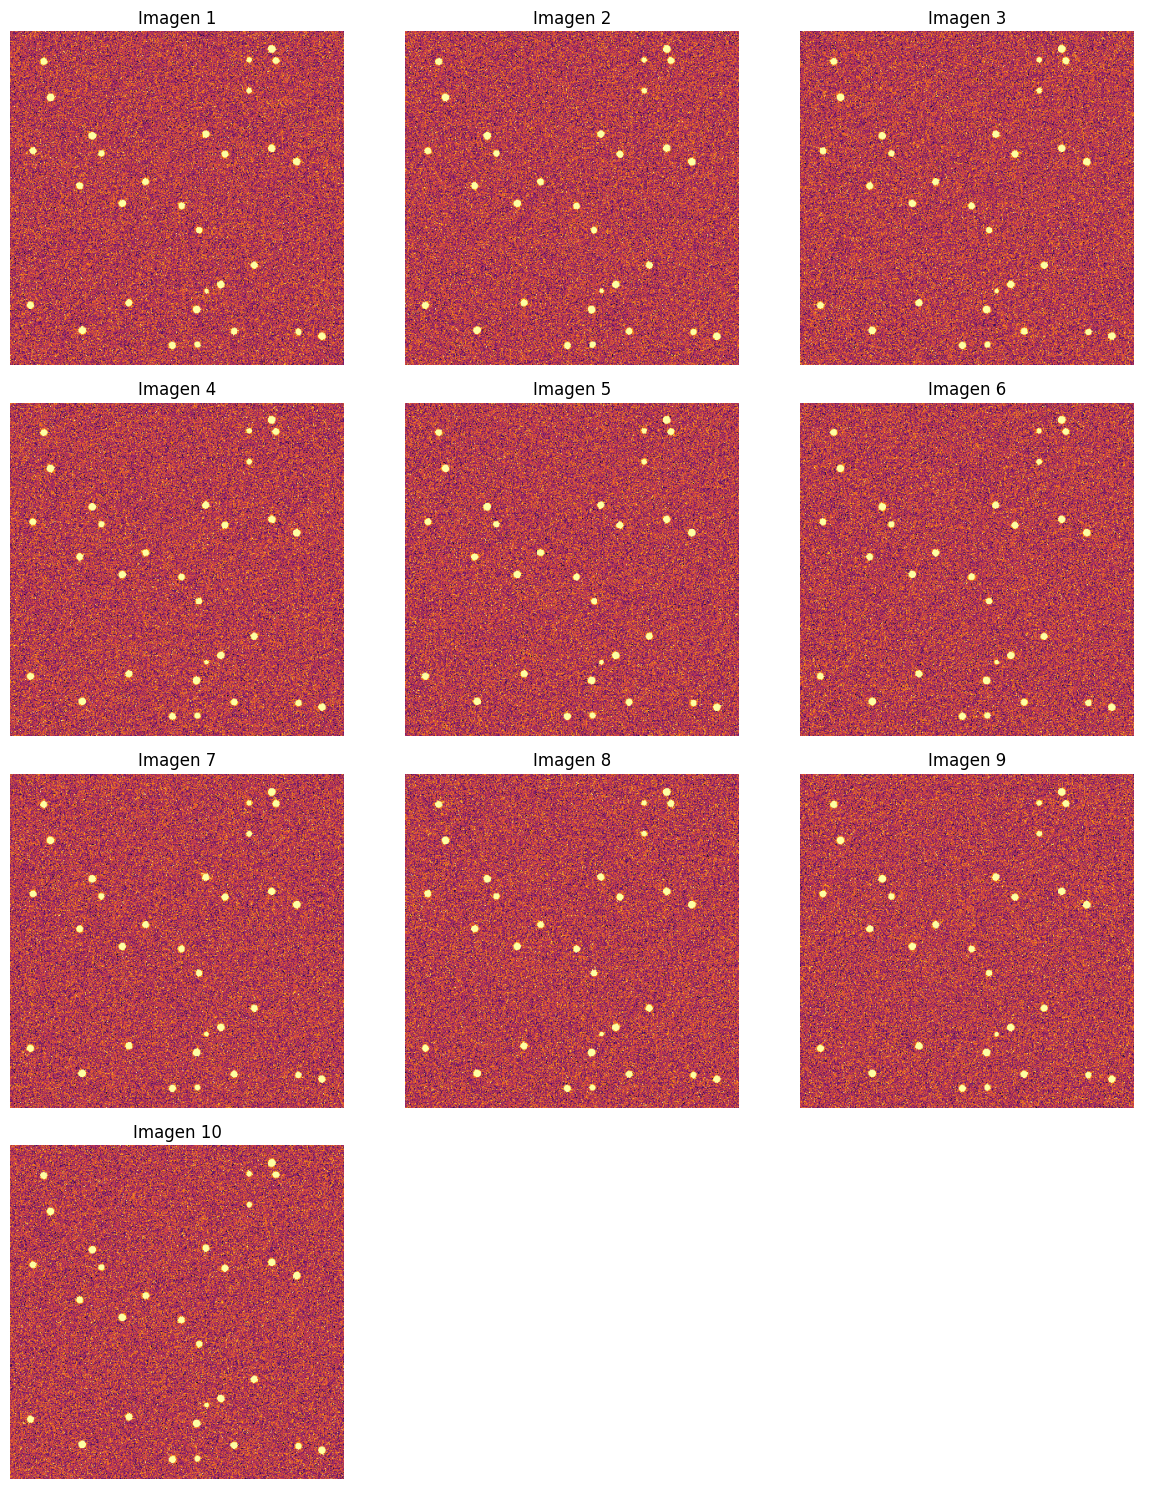

In [96]:
# Encontrar valores mínimos y máximos globales
vmin = 900
vmax = 1100

# Graficar con escala fija
fig, axes = plt.subplots(4, 3, figsize=(12, 15))
axes = axes.flatten()
for i in range(10):
    axes[i].imshow(imagenes_ciencia[i], cmap="inferno", vmin=vmin, vmax=vmax)
    axes[i].set_title(f"Imagen {i+1}")
    axes[i].axis("off")
for j in range(10, len(axes)):
    axes[j].axis("off")
plt.tight_layout()
plt.show()

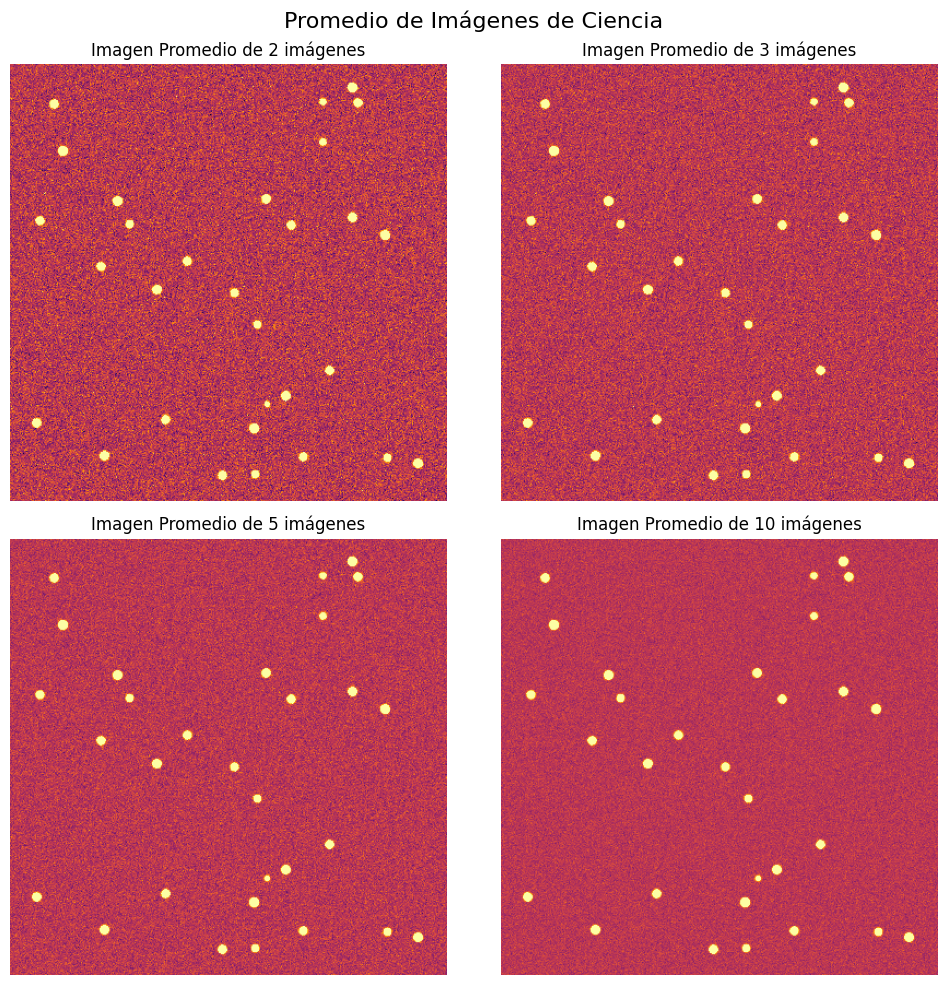

In [97]:
imagenes_ciencia_avg = []

fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 5x2 grid, más alto para que se vean grandes
axes = axes.flatten()  # Aplanar para recorrer fácilmente
fig.suptitle("Promedio de Imágenes de Ciencia", fontsize=16)
comb = [2, 3, 5, 10]

for i in range(len(comb)):
    seleccionadas = imagenes_ciencia[:comb[i]]
    img = np.mean(seleccionadas, axis=0)
    imagenes_ciencia_avg.append(img)

    axes[i].imshow(img, cmap="inferno", vmin=vmin, vmax=vmax)
    axes[i].set_title(f"Imagen Promedio de {comb[i]} imágenes")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [98]:
import pandas as pd

data = []
for n in [2, 3, 5, 10]:
    if n == 1:
        img = imagenes_ciencia[0]  # Individual
    else:
        img = np.mean(imagenes_ciencia[:n], axis=0)
    
    data.append({
        "N": n,
        "Media": img.mean(),
        "Varianza": img.var(),
        "SNR (Media/Std)": img.mean() / img.std()
    })

df = pd.DataFrame(data)
df

N        Media      Varianza  SNR (Media/Std)
0   2  1011.413255  32686.467534         5.594286
1   3  1011.463544  32531.983651         5.607832
2   5  1011.479378  32414.404940         5.618081
3  10  1011.477024  32326.294571         5.625719

**5.-** Seleccione una zona de cielo (sin estrellas) de cada una de estas im ́agenes combinadas y analice su distribucion. ¿Que tipo de distribucion espera? ¿Que ocurre con la distribucion al promediar varias imagenes? Analice tambien los perfiles de las estrellas en las imagenes combinadas, ¿hay cambios a medida que se combinan mas imagenes?

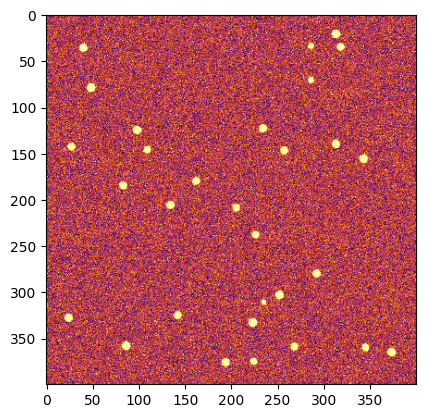

In [99]:
plt.imshow(imagenes_ciencia[0], cmap="inferno", vmin=vmin, vmax=vmax)

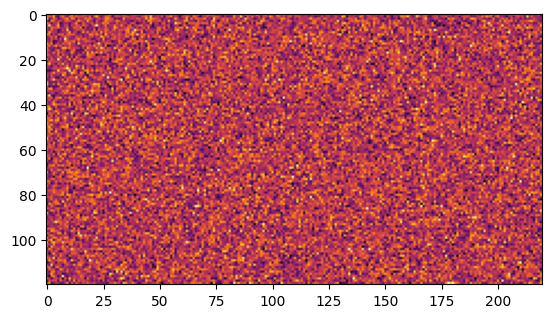

In [110]:
plt.imshow(imagenes_ciencia[0][:120, 55:275], cmap="inferno", vmin=vmin, vmax=vmax)

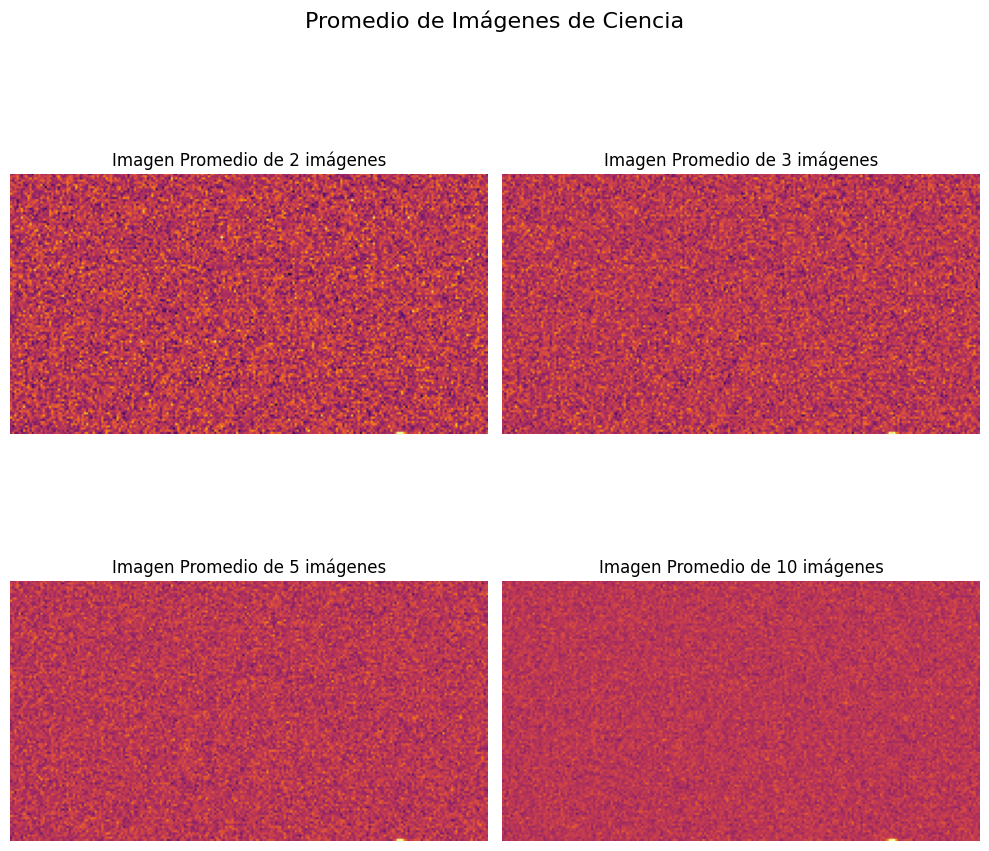

In [112]:
imagenes_ciencia_avg = []

fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 5x2 grid, más alto para que se vean grandes
axes = axes.flatten()  # Aplanar para recorrer fácilmente
fig.suptitle("Promedio de Imágenes de Ciencia", fontsize=16)
comb = [2, 3, 5, 10]

for i in range(len(comb)):
    seleccionadas = imagenes_ciencia[:comb[i]]
    img = np.mean(seleccionadas, axis=0)[:120, 55:275]
    imagenes_ciencia_avg.append(img)

    axes[i].imshow(img, cmap="inferno", vmin=vmin, vmax=vmax)
    axes[i].set_title(f"Imagen Promedio de {comb[i]} imágenes")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [113]:
data = []
for i in range(len(comb)):
    seleccionadas = imagenes_ciencia_avg[:comb[i]]
    img = np.mean(seleccionadas, axis=0)
    data.append({
        "N": n,
        "Media": img.mean(),
        "Varianza": img.var(),
        "SNR (Media/Std)": img.mean() / img.std()
    })

df = pd.DataFrame(data)
df

N       Media    Varianza  SNR (Media/Std)
0  10  999.939663  379.102948        51.356476
1  10  999.956811  281.004883        59.651904
2  10  999.965297  202.415369        70.285087
3  10  999.965297  202.415369        70.285087

**6.-** Calcule la relacion senal a ruido para cada imagen. Compare estos valores con lo observado anteriormente, ¿Concuerda con sus expectativas?

**7.-** Utilizando el paquete photutils, detecte las fuentes en las imágenes individuales, en la combinación de 5 y en la combinación de 10 imágenes. Compare la cantidad de fuentes detectadas con el número de estrellas originales. ¿Qué diferencias observa según el número de imágenes combinadas?

**8.-** Fotometría de apertura:

Realice mediciones de flujo utilizando fotometría de apertura con distintos radios (por ejemplo, 8 píxeles). Compare los flujos medidos con los valores reales (conocidos por usted, pues usted creó estas imágenes). Analice cómo varía el flujo según el radio de la apertura.

¿Es importante restar el fondo/cielo antes de medir? Justifique su respuesta.